In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target.copy()

In [3]:
# 转化为二分类问题
y[y!=0] = 1

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_predict = logistic_regression.predict(X_test)
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# 这里返回的就是分类问题的置信度分数,>=0分类为正向,<0分类为负向
decision_scores = logistic_regression.decision_function(X_test)
decision_scores

array([ 4.52818505,  6.87901472,  1.76728414,  6.52488998, -3.69893489,
        3.62555304,  4.5641345 ,  6.91106486,  5.03499692,  4.3292245 ,
        4.65382011, -3.43985382, -3.38750347, -3.39712028,  9.14590416,
        3.55830077, -5.19913952,  8.64478135,  7.05911342,  7.24100241,
        5.13254176, -3.758013  , 11.76868021, -3.89433573,  4.27903572,
        4.01351394, -4.2488403 ,  3.78927124,  8.75367646,  9.69578918,
       -4.01142913, -3.69538324,  3.69140718,  7.14170805,  1.08284202,
        5.36638089,  7.40154878, 10.56568001])

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 计算不同置信度阈值下的precision和recall
precision_scores = []
recall_scores = []
thresholds = np.sort(decision_scores)
for threshold in thresholds:
    y_predict = np.array(decision_scores>=threshold,dtype='int')
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    precision_scores.append(precision)
    recall_scores.append(recall)  

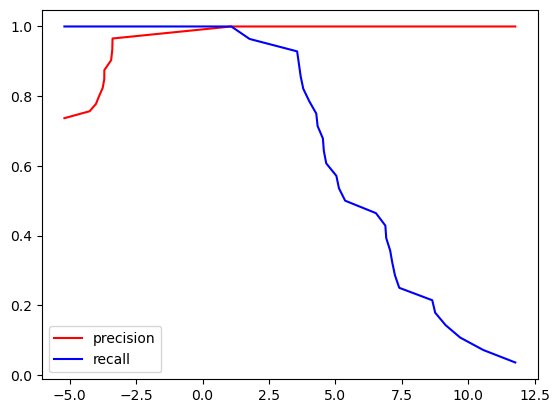

In [ ]:
plt.plot(thresholds, precision_scores, color='r',label="precision")
plt.plot(thresholds, recall_scores, color='b',label="recall")
plt.legend()
plt.show()
# 可以看到置信度阈值越高,precision越高,但是recall越低

# 1. Precision-Recall 曲线

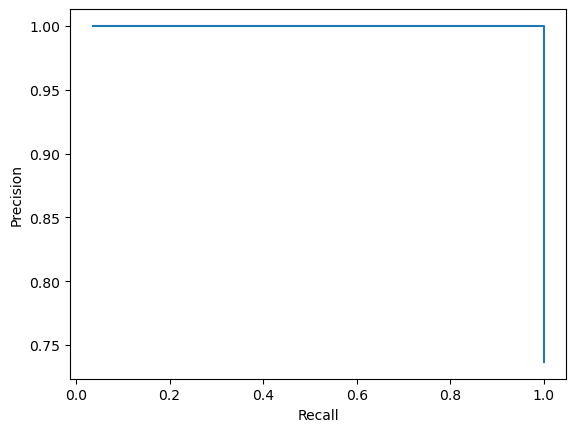

In [ ]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
# 下图是一个理想的曲线

# 2. scikit-learn中的PR曲线

In [9]:
from sklearn.metrics import precision_recall_curve

precision_scores, recall_scores,thresholds =  precision_recall_curve(y_test,decision_scores)

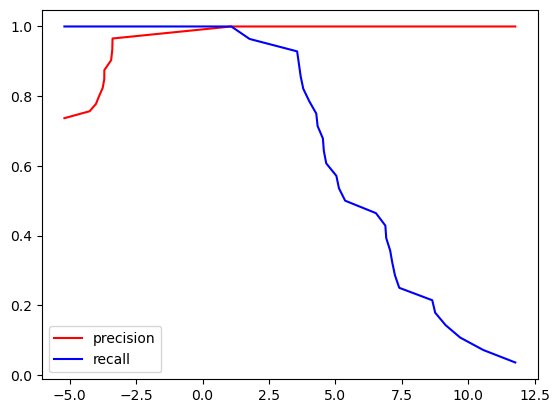

In [10]:
plt.plot(thresholds, precision_scores[:-1], color='r',label="precision")
plt.plot(thresholds, recall_scores[:-1], color='b',label="recall")
plt.legend()
plt.show()

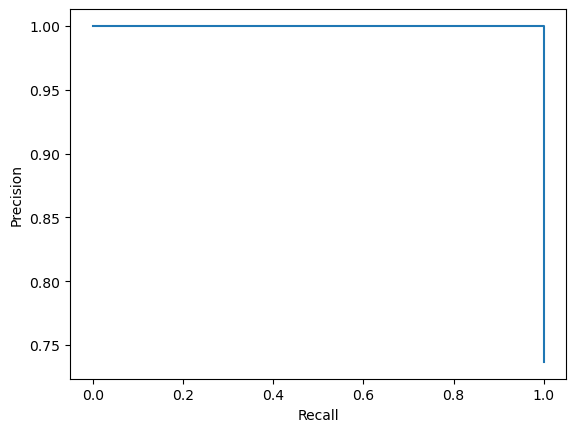

In [11]:
plt.plot(recall_scores,precision_scores)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# 3. scikit-learn中的ROC曲线

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,decision_scores)

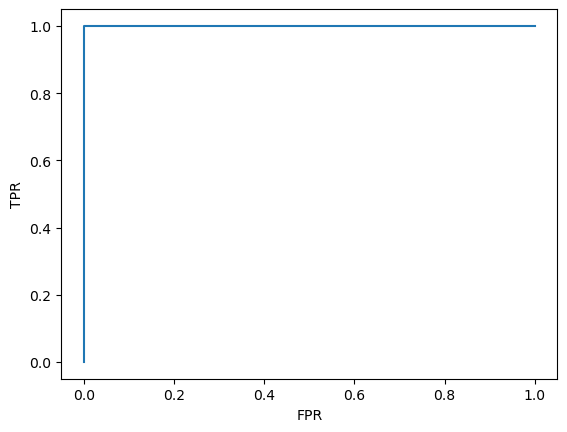

In [13]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# 4. AUC
area under curve

In [14]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,decision_scores)
auc

np.float64(1.0)